# Simple Random Walk
___
A *simple random walk* $S_n$ is a discrete-time stochastic processes on a lattice, which moves to its neighborhood at the same probability at each step.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set()

In [ ]:
def simple_ramdom_walk(step, dim=1):
    r = np.random.choice(dim*2, step)
    one_hot = np.identity(dim*2, dtype=int)[r]
    one_hot = one_hot.T
    diff = one_hot[:dim] - one_hot[dim:]
    diff[:, 0] = 0
    walk = np.cumsum(diff, axis=1)
    if dim == 1:
        walk = walk[0]
    return walk

### 1 dimension

In [ ]:
step = 3000

plt.figure(figsize=(10, 5))

walk = simple_ramdom_walk(step)

t = []
x = list()
for i, coord in enumerate(walk):
    t.extend([i, i+1])
    x.extend([coord]*2)

plt.plot(t, x)
plt.title('1-dimensional SRW')
plt.show()

In [ ]:
step = 3000
num = 20

plt.figure(figsize=(10, 5))

for _ in range(10):
    walk = simple_ramdom_walk(step)
    t = []
    x = list()
    for i, coord in enumerate(walk):
        t.extend([i, i+1])
        x.extend([coord]*2)
    plt.plot(t, x)
plt.title("1-dimensional SRWs")
plt.show()

By using central limit theorem, Random walks $S_{\lfloor nt \rfloor}/\sqrt{nt}$ converge in distribution to Brownian motions $B_t$ as $n \to \infty$.

### 2 dimension

In [ ]:
step = 3000
dim = 2

plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

x, y = simple_ramdom_walk(step, dim)
plt.plot(x, y)
plt.title("2-dimensional SRW")
plt.show()

In [ ]:
step = 3000
dim = 2
num = 10

plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

for _ in range(num):
    x, y = simple_ramdom_walk(step, dim)
    plt.plot(x, y)
plt.title("2-dimentional SRWs")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

step = 3000
dim = 3

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x, y, z = simple_ramdom_walk(step, dim)
ax.plot(x, y, z)
ax.set_title("3-dimentional SRW")
plt.show()

In [ ]:
step = 3000
dim = 3
num = 10

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')


for _ in range(num):
    x, y, z = simple_ramdom_walk(step, dim)
    ax.plot(x, y, z)
ax.set_title("3-dimensional -SRWs")
plt.show()

## Recurrence of Simple random walk
___
Fact: 2 dimensional simple random walks have the recurrence, but 3 or more dimensional simple random walks don't.

In [17]:
%%time
step = int(1e+5)
num = 100

cross_num = 0
for _ in range(num):
    x = simple_ramdom_walk(step)[1:]
    cross_num += np.any(x == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 99
Probability: 0.99
CPU times: user 234 ms, sys: 0 ns, total: 234 ms
Wall time: 230 ms


In [18]:
%%time
step = int(1e+5)
dim = 2
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 84
Probability: 0.84
CPU times: user 453 ms, sys: 0 ns, total: 453 ms
Wall time: 450 ms


In [11]:
%%time
step = int(1e+5)
dim = 3
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 33
Probability: 0.33
CPU times: user 891 ms, sys: 516 ms, total: 1.41 s
Wall time: 1.39 s


In [12]:
%%time
step = int(1e+5)
dim = 4
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 17
Probability: 0.17
CPU times: user 938 ms, sys: 641 ms, total: 1.58 s
Wall time: 1.59 s


In [13]:
%%time
step = int(1e+5)
dim = 10
num = 100

cross_num = 0
for n in range(num):
    x = simple_ramdom_walk(step, dim)[:, 1:]
    cross_num += np.any(np.sum(np.abs(x), axis=0) == 0)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 7
Probability: 0.07
CPU times: user 2.7 s, sys: 46.9 ms, total: 2.75 s
Wall time: 2.74 s


## Law of the iterated logarithm
___

$$ \limsup_{n \to \infty} \frac{S_n}{\sqrt{2n\log \log n}} = 1 \,\,\, a.s.,$$
where $S_n$ is a 1-dimensional simple random walk.

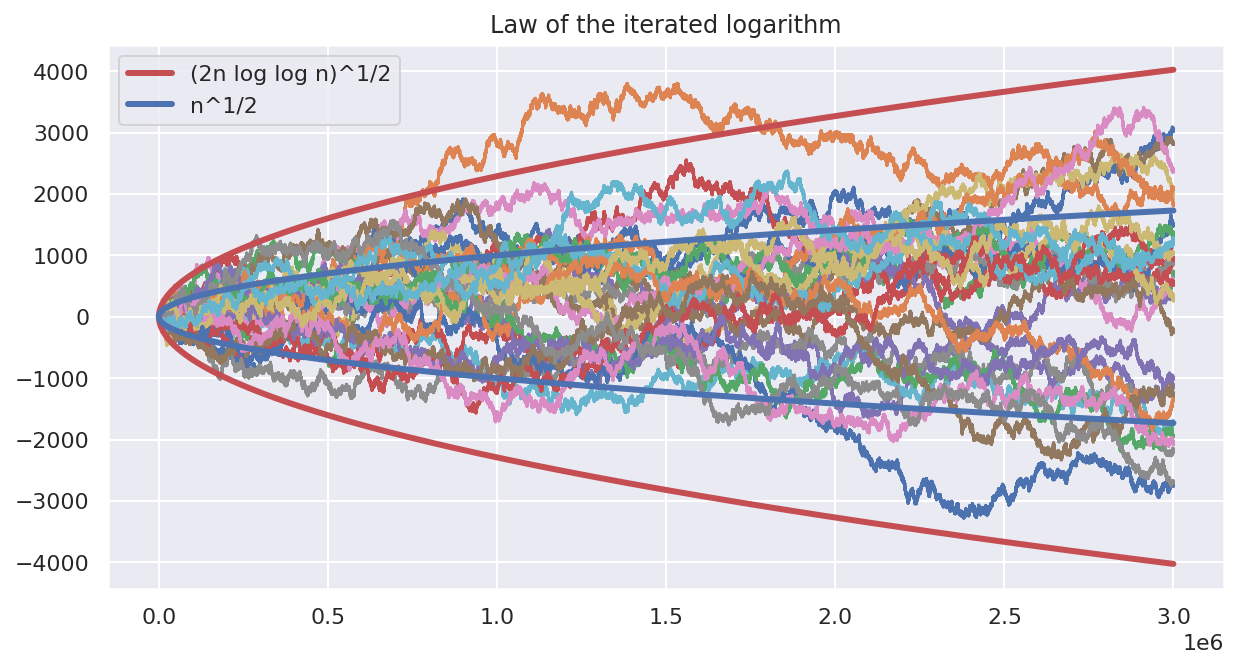

CPU times: user 1min 43s, sys: 58.2 s, total: 2min 42s
Wall time: 2min 42s


In [16]:
%%time
step = 3000000
num = 30

plt.figure(figsize=(10, 5))

for _ in range(num):
    walk = simple_ramdom_walk(step)
    plt.plot(walk)

n = np.arange(3, step+1)
x_the = np.sqrt(2 * n * np.log(np.log(n)))
plt.plot(n, x_the, color='r', linewidth=3, label='(2n log log n)^1/2')
plt.plot(n, -x_the, color='r', linewidth=3)
x_the = np.sqrt(n)
plt.plot(n, x_the, color='b', linewidth=3, label='n^1/2')
plt.plot(n, -x_the, color='b', linewidth=3)
plt.title("Law of the iterated logarithm")
plt.legend()
plt.show()

### Arc-sine law of Lévy

Same as Brownian motion. See `brownian-motion.ipynb`.